# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df = pd.DataFrame(columns={"City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"}, index=np.arange(0, len(cities)))

cities = np.array(cities)
print("Beginning Data Retrieval\n")
set_iter = 1
for index, city in np.ndenumerate(cities):
    internal_city = city
    if len(city.split()) > 1:
        internal_city = "%20".join(city.split())
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={internal_city}&units=Imperial"
    response = requests.get(url).json()
    time.sleep(1)
    try:
        cities_df.loc[index, "City"] = response['name']
        cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        print(f"Processing Record {index[0]%50 + 1} of Set {set_iter} | {city}")
    except:
        print("City not found. Skipping...")
    
    if (index[0] + 1)%50 == 0:
        set_iter += 1
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval

City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tonantins
Processing Record 4 of Set 1 | paamiut
Processing Record 5 of Set 1 | tiszaujvaros
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | azuaga
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | boa vista
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | bailen
Processing Record 19 of Set 1 | harper
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | fort nelson
Processing Record 24 of Set 1 | lebu
Processing Reco

Processing Record 5 of Set 5 | shimoda
Processing Record 6 of Set 5 | cape girardeau
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | suntar
Processing Record 9 of Set 5 | rock sound
Processing Record 10 of Set 5 | bambous virieux
Processing Record 11 of Set 5 | sobolevo
Processing Record 12 of Set 5 | chicama
Processing Record 13 of Set 5 | karaman
Processing Record 14 of Set 5 | singkang
City not found. Skipping...
Processing Record 16 of Set 5 | saint george
Processing Record 17 of Set 5 | calabar
Processing Record 18 of Set 5 | thai binh
Processing Record 19 of Set 5 | provideniya
Processing Record 20 of Set 5 | tateyama
Processing Record 21 of Set 5 | flin flon
City not found. Skipping...
Processing Record 23 of Set 5 | morros
Processing Record 24 of Set 5 | vao
Processing Record 25 of Set 5 | port macquarie
Processing Record 26 of Set 5 | powell river
Processing Record 27 of Set 5 | el alto
City not found. Skipping...
Processing Record 29 of Set 5 | lening

Processing Record 11 of Set 9 | macau
Processing Record 12 of Set 9 | sayyan
Processing Record 13 of Set 9 | farafenni
Processing Record 14 of Set 9 | mirpur mathelo
Processing Record 15 of Set 9 | morondava
Processing Record 16 of Set 9 | maceio
Processing Record 17 of Set 9 | burgthann
Processing Record 18 of Set 9 | santa maria
Processing Record 19 of Set 9 | scottsbluff
Processing Record 20 of Set 9 | tautira
City not found. Skipping...
Processing Record 22 of Set 9 | winsford
Processing Record 23 of Set 9 | hasaki
Processing Record 24 of Set 9 | uvat
Processing Record 25 of Set 9 | madera
Processing Record 26 of Set 9 | codrington
Processing Record 27 of Set 9 | chifeng
Processing Record 28 of Set 9 | peterhead
Processing Record 29 of Set 9 | bagdarin
Processing Record 30 of Set 9 | lazaro cardenas
Processing Record 31 of Set 9 | itarema
City not found. Skipping...
Processing Record 33 of Set 9 | kendari
Processing Record 34 of Set 9 | xuddur
Processing Record 35 of Set 9 | husavi

Processing Record 14 of Set 13 | forestville
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = cities_df.dropna()
cities_df.to_csv('cities.csv')
cities_df.head()

,Humidity,Wind Speed,Lat,Date,Cloudiness,Max Temp,Lng,City,Country
1,76,16.31,-23.12,1579904310,0,78.39,-134.97,Rikitea,PF
2,80,3.6,-2.87,1579904311,100,82.71,-67.8,Tonantins,BR
3,78,22.53,61.99,1579904312,100,15.94,-49.67,Paamiut,GL
4,100,4.7,47.93,1579904313,90,26.6,21.08,Tiszaujvaros,HU
5,71,5.32,3.07,1579904315,100,84.31,172.79,Butaritari,KI


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

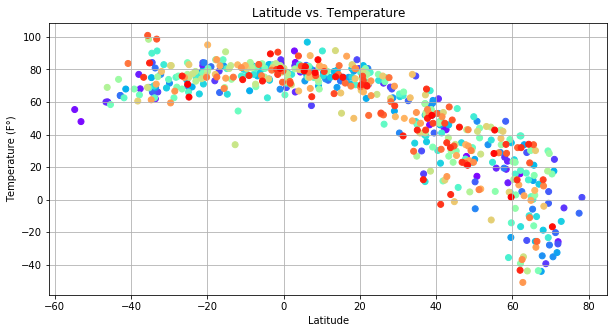

In [17]:
import matplotlib.cm as cm
plt.figure(figsize=(10,5))
colors = cm.rainbow(np.linspace(0, 1, len(cities_df)))
cities_df = pd.read_csv('cities.csv')
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], color = colors)
plt.title('Latitude vs. Temperature')
plt.xlabel("Latitude")
plt.ylabel('Temperature (F\N{DEGREE SIGN})')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

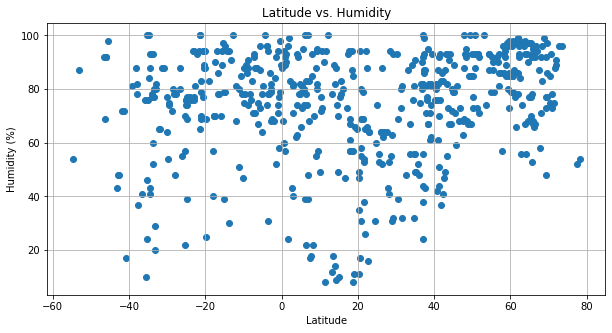

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Humidity'])
plt.title('Latitude vs. Humidity')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

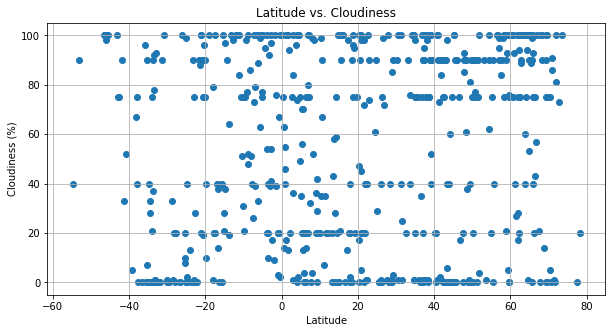

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Cloudiness'])
plt.title('Latitude vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

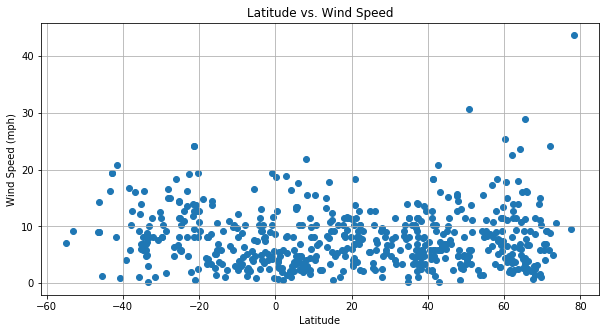

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Wind Speed'])
plt.title('Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

### OPTIONAL: Create a function to create Linear Regression plots


In [21]:
# Create Northern and Southern Hemisphere DataFrames
n_hemis_df = cities_df[cities_df['Lat'] > 0]
s_hemis_df = cities_df[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = -0.5588516010075456
Intercept: = 61.17325416944904


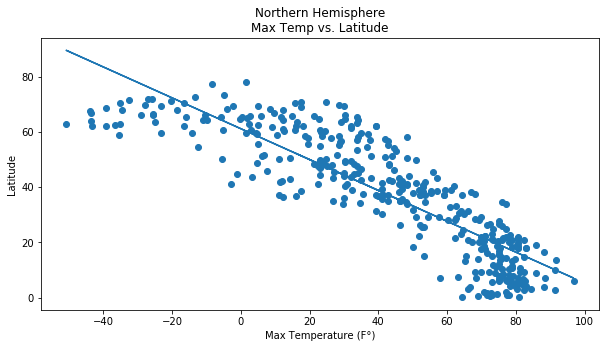

In [22]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Max Temp'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Max Temp'] + intercept

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')


plt.scatter(n_hemis_df['Max Temp'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Max Temp'], fit_model)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = 0.5532124778078742
Intercept: = -62.34523860647968


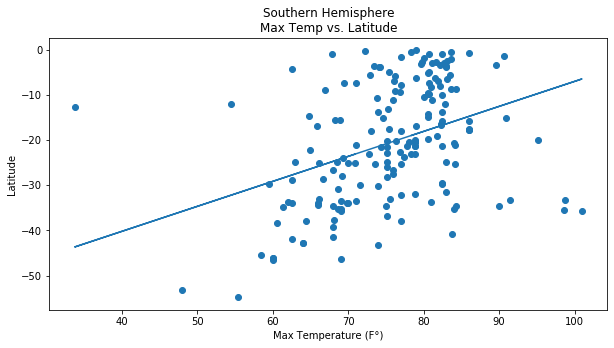

In [23]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Max Temp'],s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Max Temp'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Max Temp'],s_hemis_df['Lat'])
plt.plot(s_hemis_df['Max Temp'], fit_model)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.33419015620381726
Intercept: = 12.630245715935498


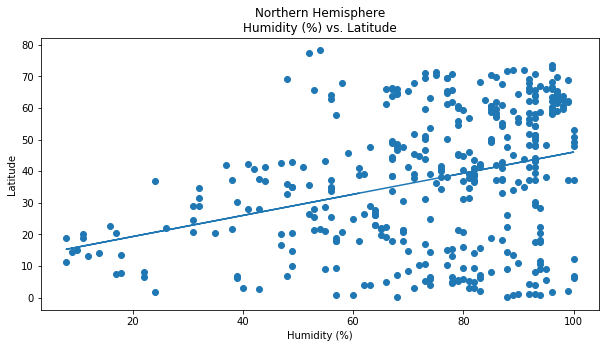

In [24]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Humidity'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Humidity'] + intercept

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Humidity'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Humidity'], fit_model)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.15526423693138997
Intercept: = -32.14549181197955


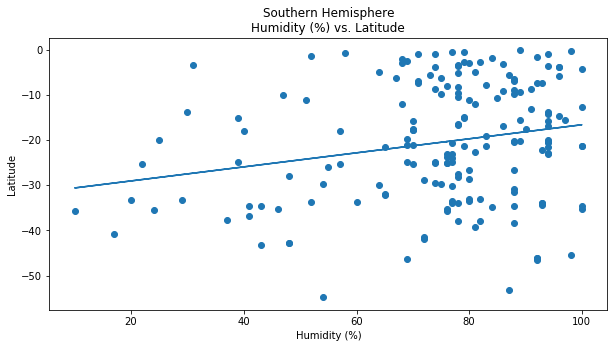

In [25]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Humidity'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Humidity'] + intercept

plt.figure(figsize=(10,5))
plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')
plt.scatter(s_hemis_df['Humidity'], s_hemis_df['Lat'])
plt.plot(s_hemis_df['Humidity'], fit_model)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.11098534797300562
Intercept: = 31.12847354458926


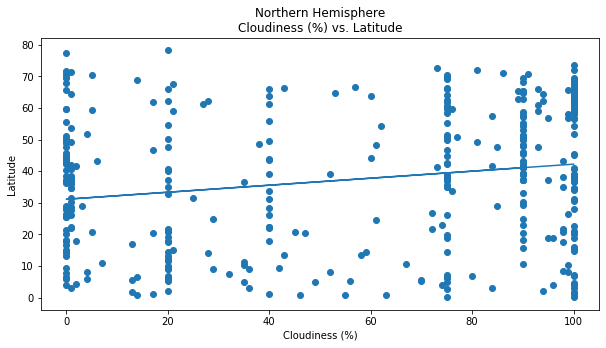

In [26]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Cloudiness'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Cloudiness'] + intercept

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nCloudiness (%) vs. Latitude')
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Cloudiness'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Cloudiness'], fit_model)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.05010266390214546
Intercept: = -23.023787764318005


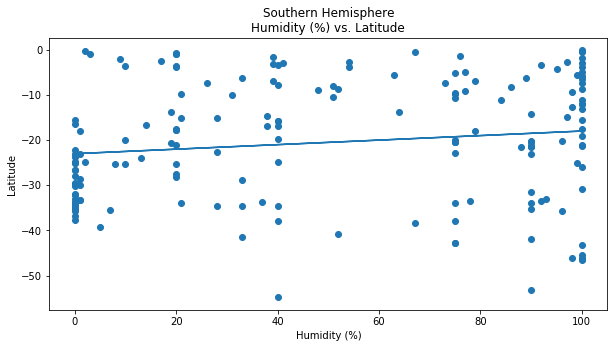

In [27]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Cloudiness'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Cloudiness'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Cloudiness'], s_hemis_df['Lat'])
plt.plot(s_hemis_df['Cloudiness'], fit_model)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = 0.5640639227079514
Intercept: = 32.90127211303426


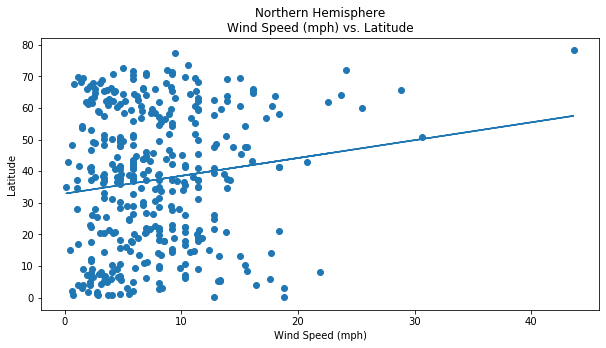

In [28]:
slope, intercept, r_value, p_value, stderr = linregress(n_hemis_df['Wind Speed'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * n_hemis_df['Wind Speed'] + intercept

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Wind Speed'],n_hemis_df['Lat'])
plt.plot(n_hemis_df['Wind Speed'], fit_model)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = -0.6336455812399154
Intercept: = -15.22733893158243


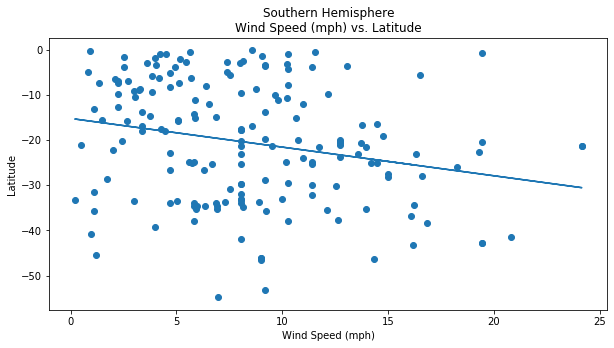

In [29]:
slope, intercept, r_value, p_value, stderr = linregress(s_hemis_df['Wind Speed'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}")

fit_model = slope * s_hemis_df['Wind Speed'] + intercept

plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Wind Speed'], s_hemis_df['Lat'])
plt.plot(s_hemis_df['Wind Speed'], fit_model)
plt.show()